<a href="https://colab.research.google.com/github/stevengiacalone/Python-workshop/blob/main/Session_4_SciPy_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SciPy

Today we'll be focusing on SciPy, a Python library for scientific and technical computing. We'll start by going over some of the useful functionalities of the library. Then we'll turn our attention to curve fitting, which is a method for estimating the parameters of a function based on data.

More information about SciPy and its uses can be found here: https://docs.scipy.org/doc/scipy/tutorial/index.html. Some modules not discussed here are:
- Statistics
- Fourrier Transforms
- Signal Processing
- Linear Algebra
- Multidimensional Image Processing

### Integration

The `scipy.integrate` library contains several options for integrating functions in Python. Here, we'll focus on the simplest one: `quad`.

In [175]:
from scipy import integrate

First, let's define a simple function that we want to integrate. In this example, we'll go with

$f(x) = A x^2$

where $A$ is some constant. We know this integrates to

$∫ f(x) dx = ∫ A x^2 dx = A x^3 / 3$.

If we set $A$ eqal to 1 and integrate over the range [0, 1], we should get 0.33.

In [176]:
def my_func(x, A):
    return A*x**2

A = 1
I = integrate.quad(
    func = my_func, # define the function you want to integrate
    a = 0,          # set the starting value you are integrating over
    b = 1,          # set the ending value you are integrating over
    args=(A)        # set the values of any other arguments in the function
    )

print(I[0])

0.33333333333333337


You can also perform double integrals, triple integrals, etc using the `dblquad`, `tplquad`, and `nquad` functions. Let's try a double integral of the function

$f(t,x) = \frac{e^{-x t}}{t^n}$

where $n$ is some integer greater than 0. Evaluating $t$ over [1, $∞$] and $x$ over [0, $∞$] gives us

$∫_0^∞ ∫_1^∞ f(t,x) dt dx = \int_0^∞ ∫_1^∞ \frac{e^{-x t}}{t^n} dt dx = \frac{1}{n}$.

In [180]:
import numpy as np

def my_func(t, x, n):
    return np.exp(-x*t)/t**n

n = 4
I = integrate.dblquad(
    func = my_func,  # define the function you want to integrate
    a = 0,           # set lower bound of x
    b = np.inf,      # set upper bound of x
    gfun = 1,        # set lower bound of t
    hfun = np.inf,   # set upper bound of t
    args=(n,)        # set value of additional argument
    )

print(I[0])

0.2500000000043577


### Interpolation

Sometimes you will have data and points $x_1$ and $x_2$, but you really need to know the value in between those two points. In these circumstances, it is common to use interpolation to estimate this value. Here, we'll go over two types of interpolation: piecewise linear interpolation and cubic spline interpolation.

In piecewise linear interpolation, you simply draw a straight line between two adjacent points and assume all values fall along that line. We can do this using NumPy using the `np.interp` function. Let's see an example.

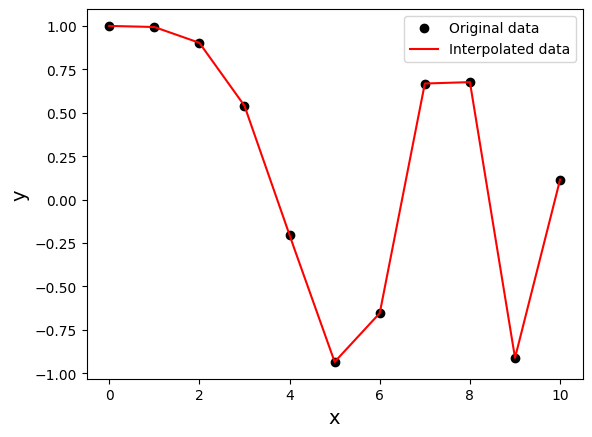

In [181]:
# define some sparsely sampled data
x = np.linspace(0, 10, 11)
y = np.cos(-x**2 / 9.0)

# define a new high-resolution x grid that you want to interpolate onto
xnew = np.linspace(0, 10, 1001)

# use np.interp to calculate y values at each new x value
ynew = np.interp(
    x = xnew,   # x grid you want to interpolate into
    xp = x,     # x data you are interpolating between
    fp = y      # y data you are interpolating between
    )

# plot the original and new data to see what it looks like
import matplotlib.pyplot as plt

plt.plot(x, y, "ko", label="Original data")
plt.plot(xnew, ynew, "r-", label="Interpolated data")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=10)
plt.show()

As you can see, the piecewise linear interpolation doesn't fill in the gaps perfectly, but it is often used anyway because it is very fast. If we want to do an interpolation that matches the form of the data more closely, we can use a cubic spline interpolation.

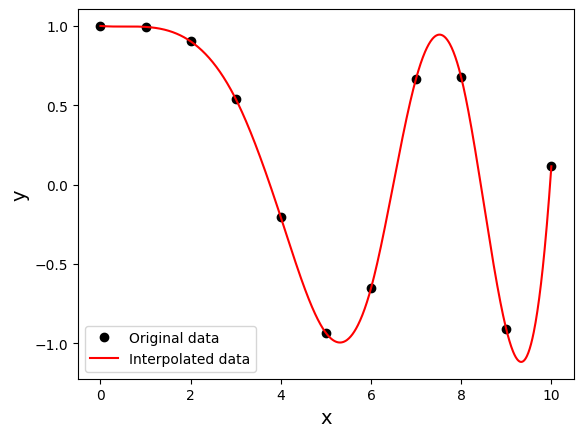

In [182]:
from scipy import interpolate

# first, define the spline object
spl = interpolate.CubicSpline(x, y)

# next, get the new y data like so
ynew = spl(xnew)

# and plot
plt.plot(x, y, "ko", label="Original data")
plt.plot(xnew, ynew, "r-", label="Interpolated data")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=10)
plt.show()

As you can see, this method gives a more realistic result.

### Optimization

SciPy comes with a ton of useful optimization function (which you can check out here: https://docs.scipy.org/doc/scipy/tutorial/optimize.html). In this section, we'll go over one of these functions: `optimize.curve_fit`.

The `curve_fit` function performs a least-squares fit of some data. In short, it solves for the minimum of the following equation:

$$ ∑ (y_i - f(x_i, Θ))^2 $$

where $x_i$ and $y_i$ are the $x$ and $y$ values of the $i$-th data point and $f$ is the model you are trying to fit the data to, which has some number of parameters represented by $\theta$. The curve_fit algorithm will determine what values of these parameters optimize the model so that it best fits the data. Let's see an example of this below, where we will fit some simulated data to a straight line.

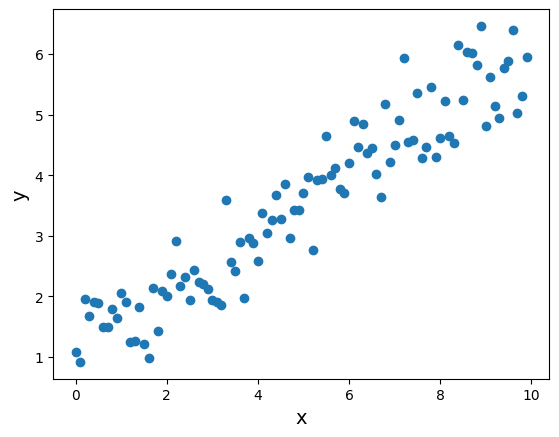

In [183]:
# simulate some data with some random noise and plot it
x_sim = np.arange(0,10,0.1)
b = 1
m = 0.5
y_sim = m*x_sim + b + np.random.normal(0, 0.5, len(x_sim))

plt.scatter(x_sim, y_sim)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

Next, we need to define our model (function), which we will assume takes the form

$$f(x) = m x + b$$

In [184]:
def my_func(x, m, b):
    return m*x + b

Lastly, we can use the `optimize.curve_fit` function to estimate the values of $m$ and $b$. This function returns two arrays:
- fitParams: the best-fit parameters of the model
- fitCovariances: the covariance matrix from the fit, which can be used to estimate the uncertainties on the best-fit parameters

In [185]:
from scipy import optimize

fitParams, fitCovariances = optimize.curve_fit(
    f = my_func,   # the name of the model to be fit
    xdata = x_sim, # the x data
    ydata = y_sim  # the y data
)

It looks like we've reached convergence! Let's print the best-fit parameters and compare to the true parameters. Let's also plot the data along with the best-fit model.

m_true = 0.5
b_true = 1

m_fit = 0.4913537687460569 +/- 0.0169573514139161
b_fit = 1.1016793106306437 +/- 0.09716873080848952



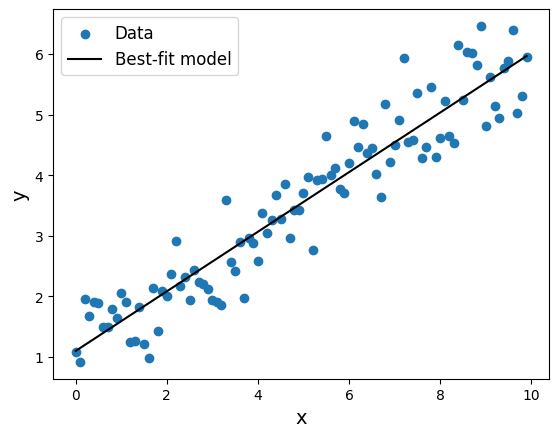

In [186]:
print("m_true =", m)
print("b_true =", b)
print()
print("m_fit =", fitParams[0], "+/-", np.sqrt(np.diag(fitCovariances))[0])
print("b_fit =", fitParams[1], "+/-", np.sqrt(np.diag(fitCovariances))[1])
print()

plt.scatter(x_sim, y_sim, label="Data")
plt.plot(x_sim, my_func(x_sim, fitParams[0], fitParams[1]), "k", label="Best-fit model")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.show()

### Exercise

In this exercise, we're going to calculate the rate at which the universe is expanding (i.e., the Hubble constant) using the cosmic distance ladder. I'm sure some of you are thinking: "What is the distance ladder?" Allow me to explain.

In astronomy, there are a few ways of determining the distances to various objects. The oldest method of caclulating distance is **parallax**. The parallax method takes advantage of the fact that as the Earth moves around the Sun, nearby stars will appear to move in the sky relative to more distant background stars. The closer the star is, the more it "moves." Using the small angle approximation, we can calculate the distance to a star using the simple equation

$p = \frac{\rm 1 \, AU}{d}$

where the parallax $p$ is in units of arcseconds and the distance $d$ is in units of parsecs (note that 1 parsec is approximately 3.26 lightyears).

![](https://itu.physics.uiowa.edu/sites/itu.physics.uiowa.edu/files/2021-08/parallax-2_med.png)

In the late 19th century and early 20th century, astronomers measured the distances of thousands of stars using this method. Some of these stars were **Cepheids**, a class of pulsating variable stars. Thanks to these parallax measurements, [Henrietta Swan Leavitt](https://en.wikipedia.org/wiki/Henrietta_Swan_Leavitt) found that the pulsation periods of Cepheids correlate directly with their intrinsic luminosities. This meant that Cepheids could be used as **standard candles**: as long as you could measure the pulsation period of a Cepheid (usually by measuring a light curve), you could figure out how far away it was.

In 1924, [Edwin Hubble](https://en.wikipedia.org/wiki/Edwin_Hubble) used Cepheids in the Andromeda nebula to show that the universe extends beyond the Milky Way, and that some of the blurry objects astronomers were seeing through their telescopes were actually aggregates of billions of stars called galaxies. This was a huge deal at the time, as it settled what was known as the [Great Debate](https://en.wikipedia.org/wiki/Great_Debate_(astronomy)) about the size and nature of the universe. In 1929, measurements of Cepheid distances in other galaxies were used to show that the universe is expanding (i.e., [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law)).

![](https://upload.wikimedia.org/wikipedia/commons/6/6c/Delta_Cephei_lightcurve.jpg)


Much later, another standard candle was discovered: **Type Ia supernovae**. These are supernovae that occur when a white dwarf accretes mass from a close-in binary stars. When the mass of the white dwarf exceeds the [Chandrasekhar limit](https://en.wikipedia.org/wiki/Chandrasekhar_limit#:~:text=The%20Chandrasekhar%20limit%20(%2F%CB%8Ct%CA%83,2.765%C3%971030%20kg).), it goes unstable and explodes. Some detected Type 1a supernovae have occurred in galaxies with observable Cepheids (and therefore know distances), allowing us to determine relationships between characteristics of the Type Ia supernova (e.g., its observed brightness over time at different wavelengths) and its distance. These only occur once every ~500 years in any individual galaxy, but with access to thousands of galaxies we can find them fairly easily.

Using Type Ia supernovae, we are able to measure the distances to galaxies that are much farther away than we could using Cepheids. Lastly, by combining galactic distance with galactic redshift (a measure of how fast the galaxy is moving away from us), we can measure the speed of the expansion of the universe as a function of distance. Because more distant objects are older, this tells us the acceleration of the expansion of the universe!

**To summarize**: The distance ladder works as follows:
- We use parallax to measure the distances of stars. Some of these stars are Cepheid variables, which we can calibrate a period-distance relationship for based on the fact that specific periods correspond to specific intrinsic luminosities.
- We use the Cepheid period-distance relationship to determine the distances to nearby galaxies. We have observed Type Ia supernovae in some of these nearby galaxies, allowing us to calibrate a limunosity-distance relationship for Type 1a supernovae.
- Laslty, we use the Type Ia supernovae to determine the distances to even more far-away galaxies.

Now, let's move on with the exercise. We'll start by determining the period-luminosity relationship for Cepheids with known distances. First, let's load some data.

In [187]:
from astropy.io import fits
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

hdul = fits.open('R16T4.fit')
df_all = pd.DataFrame(hdul[1].data)
hdul.close()

# this DataFrame includes Cepheids in multiple galaxies
# let's exclude M31 (Andromeda) for now
print(f"Total number of Cepheids in table: {len(df_all)}")
df = df_all[df_all.Gal != 'M31  ']
print(f"Number of Cepheids in table excluding those in M31: {len(df)}")

df

Total number of Cepheids in table: 1486
Number of Cepheids in table excluding those in M31: 1114


,Gal,RAJ2000,DEJ2000,ID,Per,V-I,F160W,sigTot,__O_H_,SimbadName
0,M101,210.87979,54.33376,115287,17.950,0.96,22.47,0.30,9.134,[HMR2016] M101 115287 \r
1,M101,210.89127,54.35620,136682,5.358,1.06,24.41,0.57,9.118,[HMR2016] M101 136682 \r
2,M101,210.89227,54.36125,148312,11.860,1.07,22.94,0.32,9.113,[HMR2016] M101 148312 \r
3,M101,210.89351,54.36826,164932,14.920,1.13,23.03,0.32,9.105,[HMR2016] M101 164932 \r
4,M101,210.87982,54.33565,121146,11.860,0.96,23.14,0.45,9.136,[HMR2016] M101 121146 \r
...,...,...,...,...,...,...,...,...,...,...
1109,N4258,184.70419,47.37639,C051,17.560,1.20,23.37,0.23,8.834,[HM2015] C051 \r
1110,N4258,184.69815,47.35926,MI121312,17.580,1.17,23.34,0.26,8.887,[MSB2006] I-121312 \r
1111,N4258,184.71974,47.36516,C054,18.530,1.01,23.43,0.22,8.852,[HM2015] C054 \r
1112,N4258,184.69870,47.35607,MI118782,25.840,1.05,22.61,0.21,8.894,[MSB2006] I-118782 \r


Let's explore this data a little bit. We'll extract three values:
- $m_W$: The Wesenheit magnitude of the star (essentially, the apparent brightness of the star)
- $\log_{10}P$: The log of the period of the Cepheid
- O/H: The metallicity of the Cepheid

Let's start with just one galaxy: NGC 4258. This galaxy is unique because it hosts what is known as a "megamaser" that has allowed us to calculate its distance very precisely. Using the Cepheids in this galaxy, we can determine the distances to other galaxies with Cepheids very precisely.

Let's start by plotting $m_W$ against $\log_{10} P$. We'll also color the points according to O/H.

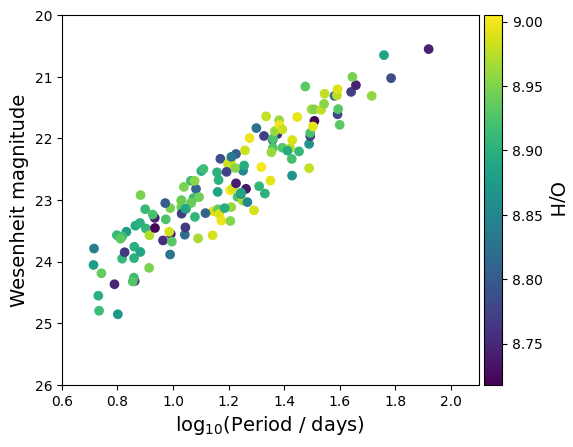

In [188]:
R = 0.39
mW = df['F160W'] - R*df['V-I']

mW_ngc4258 = mW[df.Gal == "N4258"].values
logP_ngc4258 = np.log10(df.Per[df.Gal == "N4258"].values)
O_H_ngc4258 = df.__O_H_[df.Gal == "N4258"].values

sc = plt.scatter(logP_ngc4258, mW_ngc4258, c=O_H_ngc4258)
cb = plt.colorbar(sc, pad=0.01)
cb.set_label('O/H', fontsize=14, rotation=270, labelpad=15)

plt.ylim([26,20])
plt.xlim([0.6,2.1])
plt.ylabel('Wesenheit magnitude', fontsize=14)
plt.xlabel('log$_{10}$(Period / days)', fontsize=14)
plt.show()

Let's assume all of the Cepheids in this galaxy are approximately the same distance away from us and that $m_W$ depends only on $\log_{10}P$ and O/H. This relationship can be described by the equation

$$m_W = {\rm zp} + b \log_{10} P + Z ({\rm O/H})$$

where ${\rm zp}$ is the "zero point" (y intercept) and $b$ and $Z$ are coefficients describing how much the brightness of the Cepheid changes with period and metallicity.

##### Task 1

Fill in the function below and then fit for ${\rm zp}$, $b$, and $Z$ using the NGC 4258 data. Reproduce the plot above with the best-fit model overplotted.

In [191]:
def my_func(x, zp, b, Z):
    logP, O_H = x # x is a 2d array where the first column is logP and the second is O_H
    mW = zp + b*logP + Z*O_H
    return mW

In [192]:
x_data = np.array([logP_ngc4258, O_H_ngc4258])

fitParams, fitCovariances = optimize.curve_fit(
    f = my_func,   # the name of the model to be fit
    xdata = x_data, # the x data
    ydata = mW_ngc4258  # the y data
)

print('zp =', fitParams[0], "+/-", np.sqrt(np.diag(fitCovariances))[0])
print('b =', fitParams[1], "+/-", np.sqrt(np.diag(fitCovariances))[1])
print('Z =', fitParams[2], "+/-", np.sqrt(np.diag(fitCovariances))[2])

zp = 27.038698414573243 +/- 3.3854939377155673
b = -3.1655712968711014 +/- 0.11284094858818337
Z = -0.05913096502374628 +/- 0.3809724027450503


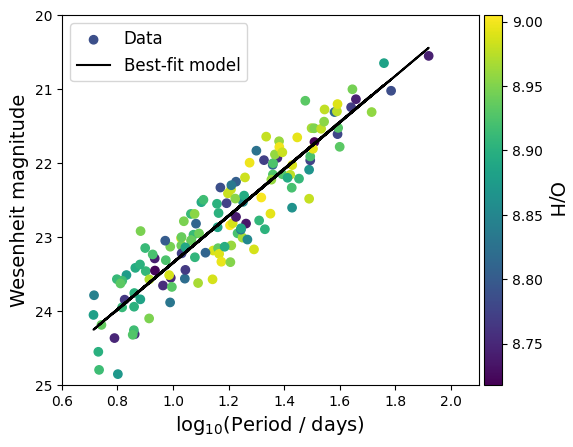

In [193]:
sc = plt.scatter(logP_ngc4258, mW_ngc4258, c=O_H_ngc4258, label="Data")
cb = plt.colorbar(sc, pad=0.01)
cb.set_label('O/H', fontsize=14, rotation=270, labelpad=15)

plt.plot(logP, my_func(x_data, fitParams[0], fitParams[1], fitParams[2]), "k", label="Best-fit model")

plt.ylim([25,20])
plt.xlim([0.6,2.1])
plt.ylabel('Wesenheit magnitude', fontsize=14)
plt.xlabel('log$_{10}$(Period / days)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

##### Task 2

Now that we've determined these coefficients (which should be true for all Cepheids, regardless of galaxy), we can move on to the next step and calculate the distances to *all* of the galaxies in our table. In astronomy, we often express the distance of an object using the **distance modulus ($\mu$)**, which is given by

$$\mu = m - M = 5 \log_{10} \frac{d}{10 \, {\rm pc}}$$

where $m$ is the apparent magnitude and $M$ is the absolute magnitude (a proxy for intrinsic luminosity).

We can calculate $\mu$ for each galaxy in our table using the following equation

$$m_W = (\mu - \mu_{\rm ngc4258}) + {\rm zp} + b \log_{10} P + Z ({\rm O/H})$$

Using a for loop, calculate $\mu$ for each galaxy in the table. Assume the values of ${\rm zp}$, $b$, and $Z$ are equal to those calculated in the previous part. Assume the distance modulus for NGC 4258 is $\mu_{\rm ngs4258} = 29.387$. Print and save the value of $\mu$ for each galaxy (it should be close to 30 for each).

In [194]:
def my_func(x, mu):
    logP, O_H = x
    mu_ngs4258 = 29.387
    zp = 27.038698414573243
    b = -3.1655712968711014
    Z = -0.05913096502374628
    mW = (mu - mu_ngs4258) + zp + b*logP + Z*O_H
    return mW

In [195]:
galaxies = ['M101 ', 'N1015', 'N1309', 'N1365', 'N1448', 'N2442', 'N3021', 'N3370', 'N3447', 'N3972',
            'N3982', 'N4038', 'N4424', 'N4536', 'N4639', 'N5584', 'N5917', 'N7250', 'U9391']
distance_moduli = np.zeros(len(galaxies))

for i in range(len(galaxies)):
    this_galaxy = galaxies[i]
    mW_i = mW[df.Gal == this_galaxy].values
    logP_i = np.log10(df.Per[df.Gal == this_galaxy].values)
    O_H_i = df.__O_H_[df.Gal == this_galaxy].values

    x_data_i = np.array([logP_i, O_H_i])

    ### FINISH CODE BELOW TO CALCULATE DISTANCE MODULUS FOR EACH GALAXY ###

    fitParams, fitCovariances = optimize.curve_fit(
        f = my_func,   # the name of the model to be fit
        xdata = x_data_i, # the x data
        ydata = mW_i  # the y data
    )
    this_mu = fitParams[0]

    #######################################################################

    # print the distance modulus
    print("mu for", this_galaxy, "is", this_mu)

    # save distance modulus to array
    distance_moduli[i] = this_mu

mu for M101  is 29.15318625648425
mu for N1015 is 32.509307443026714
mu for N1309 is 32.49803891276623
mu for N1365 is 31.377820292609258
mu for N1448 is 31.324303928782776
mu for N2442 is 31.537111355653686
mu for N3021 is 32.51094960042871
mu for N3370 is 32.101173577148515
mu for N3447 is 31.99424206809743
mu for N3972 is 31.653156019100212
mu for N3982 is 31.7444633478415
mu for N4038 is 31.36271442218033
mu for N4424 is 30.86833846881403
mu for N4536 is 30.97109279428779
mu for N4639 is 31.46026040264079
mu for N5584 is 31.81483755872677
mu for N5917 is 32.273078060643925
mu for N7250 is 31.448429866766418
mu for U9391 is 32.94186587242778


##### Task 3

Now that we've determined the distances to these galaxies, we can start talking about Type Ia supernovae. Each of these galaxies has has a Type Ia supernova detected in it with some apparent brightness $m_B$. In this task, we will determine the $B$-band absolute magnitude ($M_B$) of all Type Ia supernovae by combining these distances with their apparent brightnesses.

To do this, use the definition of the distance modulus given above. You should find $M_B$ to be approximately -19.29.

In [ ]:
# Supernova data from Riess et al. (2016)
aB = 0.71273
Tab5 = np.array([13.310, 17.015, 16.756, 15.482, 15.765, 15.840, 16.527, 16.476, 16.265, 16.048,
                 15.795, 15.797, 15.110, 15.177, 15.983, 16.265, 16.572,  15.867, 17.034])
mB = Tab5-5*aB

In [196]:
def my_func(m, M):
    mu = m - M
    return mu

In [198]:
### CALCULATE AND PRINT MB USING optimize.curve_fit

fitParams, fitCovariances = optimize.curve_fit(
    f = my_func,   # the name of the model to be fit
    xdata = mB, # the x data
    ydata = distance_moduli  # the y data
)

print("M_B =", fitParams[0], "+/-", np.sqrt(fitCovariances[0,0]))

M_B = -19.27209053943512 +/- 0.035844160705347


##### Task 4

Now that we know the distance to each galaxy and the abosolute magnitude of a Tyle Ia supernova, we can calculate the Hubble constant.


In the next cell I load in data from over 200 Type Ia supernovae, which come from the papers [Betoule et al. (2014)](https://www.aanda.org/articles/aa/pdf/2014/08/aa23413-14.pdf) and [Hicken et al. (2009)](https://iopscience.iop.org/article/10.1088/0004-637X/700/2/1097/pdf). You can ignore  the contents of this cell and just run it.

In [199]:
hdul = fits.open('B14TF3.fit')
df_hubble = pd.DataFrame(hdul[1].data)
hdul.close()
df_1 = df_hubble[(df_hubble.zcmb > 0.0233) & (df_hubble.zcmb < 0.15)]

hdul = fits.open('H9T2.fit')
df_hubble = pd.DataFrame(hdul[1].data)
hdul.close()
df_2 = df_hubble[(df_hubble.zCMB > 0.0233) & (df_hubble.zCMB < 0.15)]

temp = np.array(df_1.Name)[102:]
B14TF3_names = []
for name in temp:
    B14TF3_names.append("".join(name.split()))
# print(B14TF3_names)

temp = np.array(df_2.SimbadName)
H9T2_names = []
for name in temp:
    lowercase = name.lower()
    H9T2_names.append("".join(lowercase.split()))
# print(H9T2_names)

common_names = np.intersect1d(B14TF3_names, H9T2_names)
# print('Detections in both datasets:', common_names)
mask = np.zeros(len(H9T2_names))
for i in range(len(H9T2_names)):
    if H9T2_names[i] in common_names:
        mask[i] = 0
    else:
        mask[i] = 1

# mask H9T2 dataframe so it only has the unique detections
df_3 = df_2[mask == 1.]

y = np.concatenate((0.2*df_1.mb, 0.2*df_3.Bmag))
yerr = np.concatenate((0.2*df_1.e_mb, 0.2*df_3.e_Bmag))
q0 = -0.55
x = np.concatenate((np.log10(df_1.zcmb*3e5*(1 + 0.5*(1-q0)*df_1.zcmb - (1/6)*(1-q0-3*q0**2+1)*df_1.zcmb**2)), np.log10(df_3.zCMB*3e5*(1 + 0.5*(1-q0)*df_3.zCMB - (1/6)*(1-q0-3*q0**2+1)*df_3.zCMB**2))))

/usr/local/lib/python3.10/dist-packages/astropy/io/fits/column.py:1606: VerifyWarning: Invalid keyword for column 2: ASCII table null option (TNULLn) is longer than the column's character width and will be truncated (got '255').
  warnings.warn(


We now have some data (defined as `x` and `y`). Don't worry too much about what these variables represent for now, just know that they can be used to find $\log_{10}H_0$, where $H_0$ is the Hubble constant in units of km/s/Mpc. If you want to do a deep-dive, take a look at [Reiss et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...826...56R/abstract).

Using optimize.curve_fit, calculate the Hubble constant from this data. The equation for finding $\log_{10} H_0$ is as follows:

$$ y = 0.2 M_B + x + 5 - \log_{10} H_0 $$

What value do you get? Does it agree with the value measured from the Cosmic Microwave Background from the Planck mission ($H_0 = 66.93 ± 0.62$ km/s/Mpc)?

In [201]:
def my_func(x, H0):
    MB = -19.27209053943512
    y = 0.2*MB + x + 5 - np.log10(H0)
    return y

fitParams, fitCovariances = optimize.curve_fit(
    f = my_func,
    xdata = x,
    ydata = y
)

print("H_0 =", fitParams[0], "+/-", np.sqrt(fitCovariances[0,0]), "km/s/Mpc")

H_0 = 62.62068352128572 +/- 0.7053812400589259 km/s/Mpc
